In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.io
import os

In [2]:
os.chdir('C:/Users/jarves/Desktop/Machine Learning/Andrew NG/ex7')

In [3]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    normalized_X = np.divide(X - mu,sigma)

    return (normalized_X, mu, sigma)

In [4]:
def pca(X):
    covar = np.dot(X.T,X) / len(X)
    U, S, V = np.linalg.svd(covar)
    return (U, S)

In [6]:
def projectData(X, U, K):
    U_reduce = U[:, 0:K]
    Z = np.zeros((len(X), K))
    for i in range(len(X)):
        x = X[i,:]
        projection_k = np.dot(x, U_reduce)
        Z[i] = projection_k
    return Z

In [8]:
def recoverData(Z, U, K):
    X_rec = np.zeros((len(Z), len(U)))
    for i in range(len(Z)):
        v = Z[i,:]
    for j in range(np.size(U,1)):
        recovered_j = np.dot(v.T,U[j,0:K])
        X_rec[i][j] = recovered_j
        return X_rec


In [9]:
def displayData(X):
   
    num_images = len(X)
    rows = int(num_images**.5)
    cols = int(num_images**.5)
    fig, ax = plt.subplots(rows,cols,sharex=True,sharey=True)
    img_num = 0

    for i in range(rows):
        for j in range(cols):
            # Convert column vector into 32x232 pixel matrix
            # transpose to display correctly
            img = X[img_num,:].reshape(32,32).T
            ax[i][j].imshow(img,cmap='gray')
            img_num += 1

    return (fig, ax)

# Part 1(2D data)

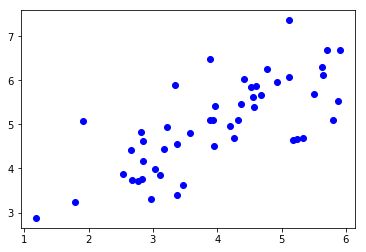

(50, 2)


In [14]:
raw_mat = scipy.io.loadmat("ex7data1.mat")
X = raw_mat.get("X")
#plt.cla()
plt.plot(X[:,0], X[:,1], 'bo')
plt.show()
print(X.shape)

In [23]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

In [24]:
K = 1
Z = projectData(X_norm, U, K)
X_rec = recoverData(Z, U, K)
print(Z.shape)
print(X_rec.shape)

(5000, 1)
(5000, 1024)


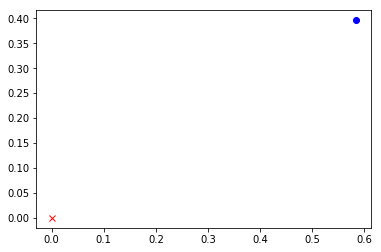

In [25]:
plt.plot(X_norm[1,0], X_norm[1,1], 'bo')
plt.plot(X_rec[1,0], X_rec[1,1], 'rx')

# Part 2(Compressing Faces)

C:\Users\jarves\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


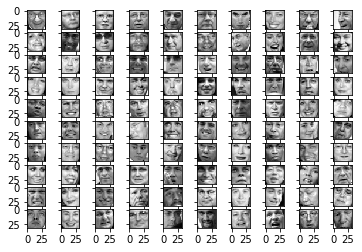

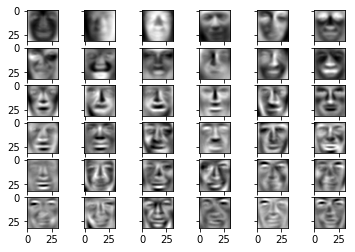

In [26]:
# Loading and Visualizing Face Data
raw_mat = scipy.io.loadmat("ex7faces.mat")
X = raw_mat.get("X")
##Plotting original images
face_grid, ax = displayData(X[:100, :])
face_grid.show()

###Plotting the first 36 princiipal components
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

face_grid, ax = displayData(U[:,:36].T)
face_grid.show()
###As you can see below,some data has been lost in the recovered images


In [27]:
print(X.shape)

(5000, 1024)


In [28]:
print(U.shape)

(1024, 1024)


In [33]:
# Dimension Reduction on Faces from 1024 dimensions to 100 dimensions
K = 100
Z_100 = projectData(X_norm, U, K)
print(Z_100.shape)
print(X_rec.shape)



(5000, 100)
(5000, 1024)


C:\Users\jarves\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


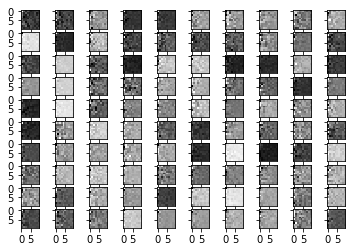

In [34]:
#Visualization of Faces after PCA
def DisplayReducedData(X):
   
    num_images = len(X)
    rows = int(num_images**.5)
    cols = int(num_images**.5)
    fig, ax = plt.subplots(rows,cols,sharex=True,sharey=True)
    img_num = 0

    for i in range(rows):
        for j in range(cols):
            # Convert column vector into 32x232 pixel matrix
            # transpose to display correctly
            img = X[img_num,:].reshape(10,10).T
            ax[i][j].imshow(img,cmap='gray')
            img_num += 1

    return (fig, ax)
face_grid, ax = DisplayReducedData(Z[:100, :])
face_grid.show()



In [35]:
X_rec = recoverData(Z_100, U, 100)

C:\Users\jarves\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


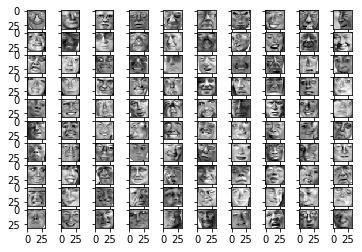

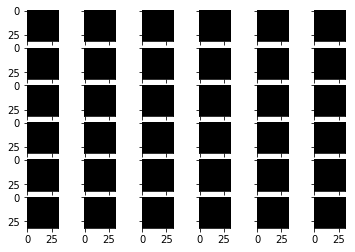

In [37]:
f, ax1 = displayData(X_norm[:100,:])
f, ax2 = displayData(X_rec[:36,:])
f.show()